In [1]:
import numpy as np
import scipy.optimize
import matplotlib.pyplot as plt

%matplotlib inline

### Задание 1. Минимизация гладкой функции

Дана функция:

$f(x)=sin(x/5) * e^{x/10} + 5*e^{-x/2}$

In [2]:
def f(x):
    return np.sin(x/5) * np.exp(x/10) + 5*np.exp(-x/2)

In [3]:
x_min = scipy.optimize.minimize(f, np.array([2]), method='BFGS')

print(x_min)
print('\nmin:', x_min.x)
print('val:', f(x_min.x))

      fun: 1.7452682903449388
 hess_inv: array([[5.98752437]])
      jac: array([-2.07126141e-06])
  message: 'Optimization terminated successfully.'
     nfev: 14
      nit: 6
     njev: 7
   status: 0
  success: True
        x: array([4.13627618])

min: [4.13627618]
val: [1.74526829]


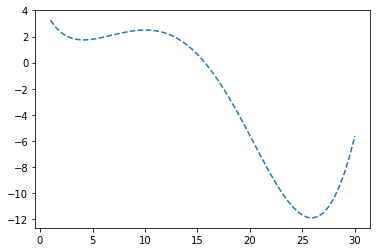

In [4]:
x = np.arange(1, 30.5, 0.5)

plt.plot(x, f(x), '--')
plt.show()

In [5]:
x_2 = scipy.optimize.minimize(f, np.array([2]), method='BFGS')
x_30 = scipy.optimize.minimize(f, np.array([30]), method='BFGS')

In [6]:
with open('3_submission-1.txt', 'w') as file:
    str_val = ' '.join(str(round(i.fun, 2))for i in [x_2, x_30])
    print(str_val)
    file.write(str_val)

1.75 -11.9


### Задание 2. Глобальная оптимизация

In [7]:
x_evo = scipy.optimize.differential_evolution(f, [(1, 30)])
print(x_evo)

     fun: array([-11.89889467])
     jac: array([3.01980638e-06])
 message: 'Optimization terminated successfully.'
    nfev: 111
     nit: 6
 success: True
       x: array([25.88019828])


In [8]:
with open('3_submission-2.txt', 'w') as file:
    str_val = ' '.join(str(round(i.fun[0], 2))for i in [x_evo])
    print(str_val)
    file.write(str_val)

-11.9


### Задание 3. Минимизация негладкой функции

In [22]:
def h(x):
    return int(f(x))

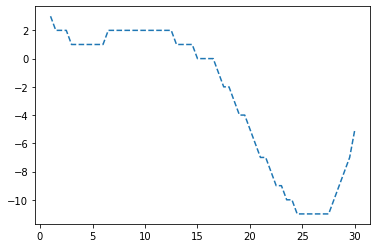

In [30]:
y = [h(k) for k in x]
plt.plot(x, y, '--')

plt.show()

In [36]:
k = 30
x_3_min = scipy.optimize.minimize(h, np.array(k), method='BFGS')
print(x_3_min)
print(h(k))

      fun: -5
 hess_inv: array([[1]])
      jac: array([0.])
  message: 'Optimization terminated successfully.'
     nfev: 2
      nit: 0
     njev: 1
   status: 0
  success: True
        x: array([30.])
-5


In [24]:
x_3_evo = scipy.optimize.differential_evolution(h, [(1, 30)])
print(x_3_evo)

     fun: -11.0
 message: 'Optimization terminated successfully.'
    nfev: 77
     nit: 4
 success: True
       x: array([25.51570185])


In [37]:
with open('3_submission-3.txt', 'w') as file:
    str_val = ' '.join(str(i.fun) for i in [x_3_min, x_3_evo])
    print(str_val)
    file.write(str_val)


-5 -11.0
